In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df.head(3)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000


In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [5]:
reg.coef_ , reg.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540408)

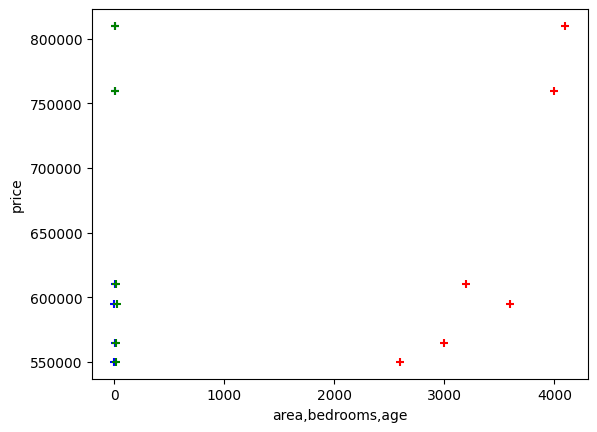

In [6]:
%matplotlib inline
plt.xlabel('area,bedrooms,age')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.scatter(df.bedrooms,df.price,color='blue',marker='+')
plt.scatter(df.age,df.price,color='green',marker='+')

In [7]:
p = pd.read_csv("area,bedrooms,age.csv")
p.head(3)

,area,bedrooms,age
0,3000,3,40
1,5400,4,20
2,1000,2,5


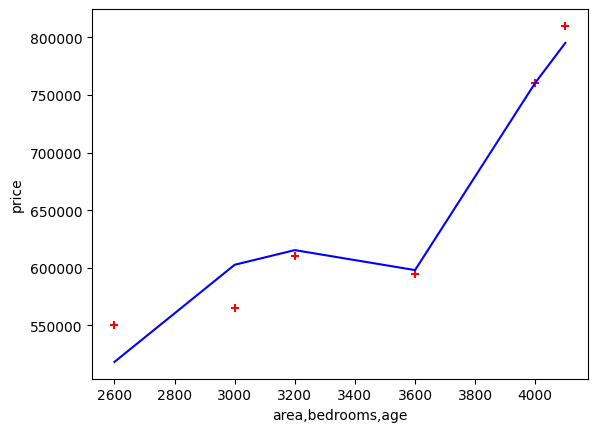

In [8]:
%matplotlib inline
plt.xlabel('area,bedrooms,age')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]),color='blue')

In [9]:
predict = reg.predict(p)
p['price'] = predict
p.to_csv("prediction.csv",index=False)